# Customer Churn Analysis

This notebook contains analysis of customer churn data to identify patterns and predictors of customer attrition.

## Setup

Import necessary libraries for data analysis and visualization.

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# XGBoost
import xgboost as xgb

# Interactive dashboard libraries
import ipywidgets as widgets
from IPython.display import display, HTML

# Set visualization styles
plt.style.use('default')
sns.set_style("whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Data Loading

Load the customer churn dataset.

Dataset shape: (7043, 21)

First 5 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

None


Summary statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Missing values in each column:


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Unique values in each column:
customerID: 7043 unique values
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
Name: count, dtype: int64

gender: 2 unique values
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner: 2 unique values
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents: 2 unique values
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService: 2 unique values
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines: 3 unique values
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService: 3 unique values
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity: 3 unique values
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup: 3 unique values
OnlineBackup
No          

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Class imbalance ratio: 1:2.77


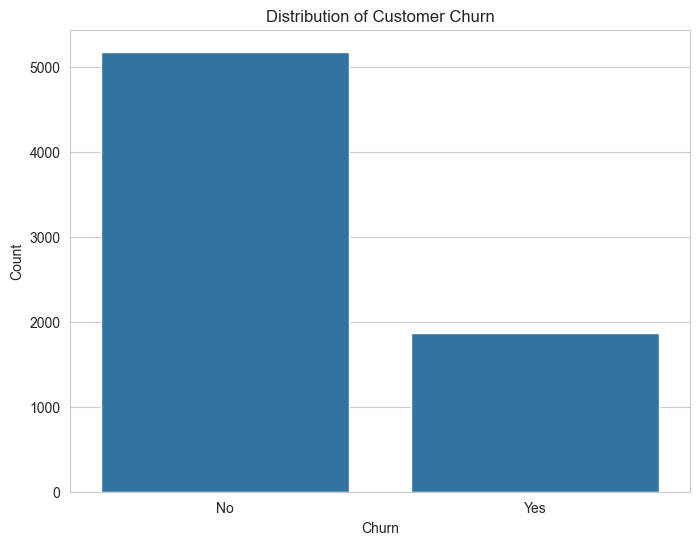

In [2]:
# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Check data types and missing values
print("\nData types and non-null counts:")
display(df.info())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique values in each column:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} unique values")
        print(df[col].value_counts().head(3))
        print()

# Check target variable distribution (class imbalance)
print("\nTarget variable distribution:")
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
display(churn_distribution)
print(f"Class imbalance ratio: 1:{round(churn_distribution.iloc[0]/churn_distribution.iloc[1], 2)}")

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.ylabel('Count')
plt.show()

## Checking multicollinearity




Target variable distribution:


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Class imbalance ratio: 1:2.77

Correlation matrix for numerical features (check for multicollinearity):


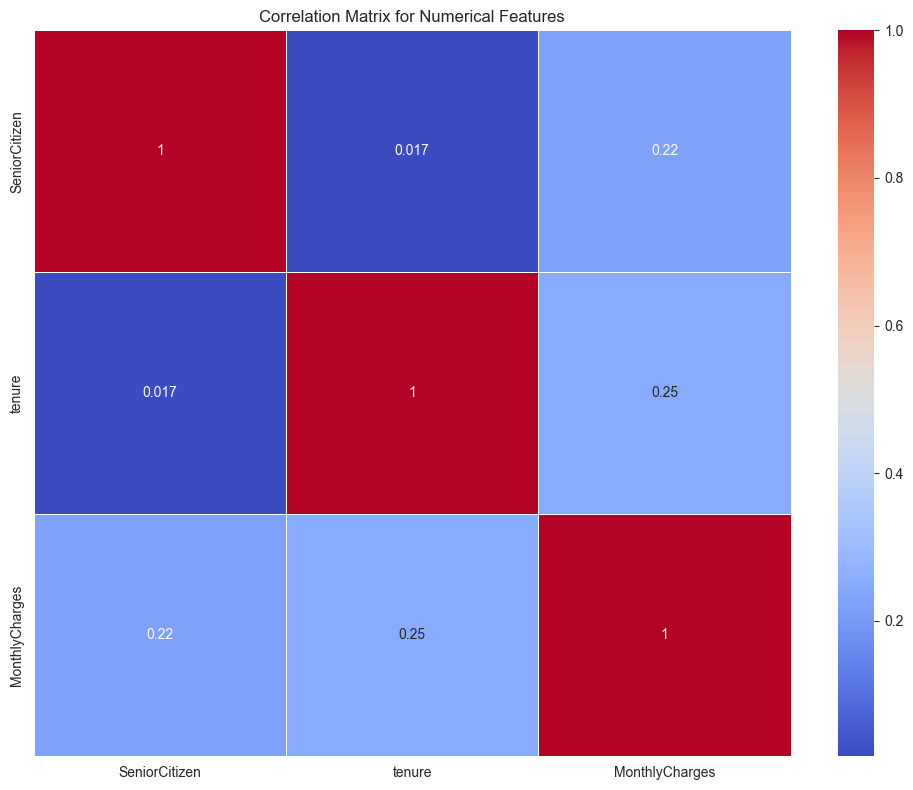

In [3]:
# Check target variable distribution (class imbalance)
print("\nTarget variable distribution:")
churn_distribution = df['Churn'].value_counts(normalize=True) * 100
display(churn_distribution)
print(f"Class imbalance ratio: 1:{round(churn_distribution.iloc[0]/churn_distribution.iloc[1], 2)}")

# Create correlation matrix to check for multicollinearity
# First, identify numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Churn' in numeric_cols:
    numeric_cols.remove('Churn')

# Create correlation matrix for numerical features
if len(numeric_cols) > 1:
    print("\nCorrelation matrix for numerical features (check for multicollinearity):")
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix for Numerical Features')
    plt.tight_layout()
    plt.show()




## Exploratory Data Analysis

First, let's explore each feature's contribution to the target variable.

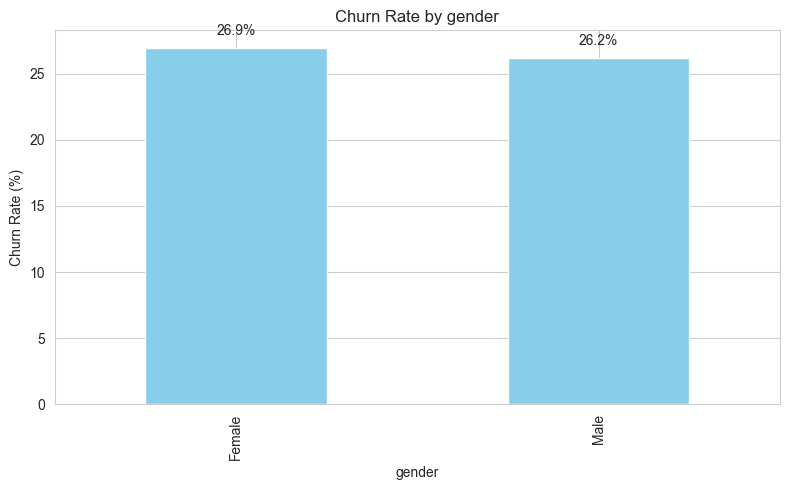

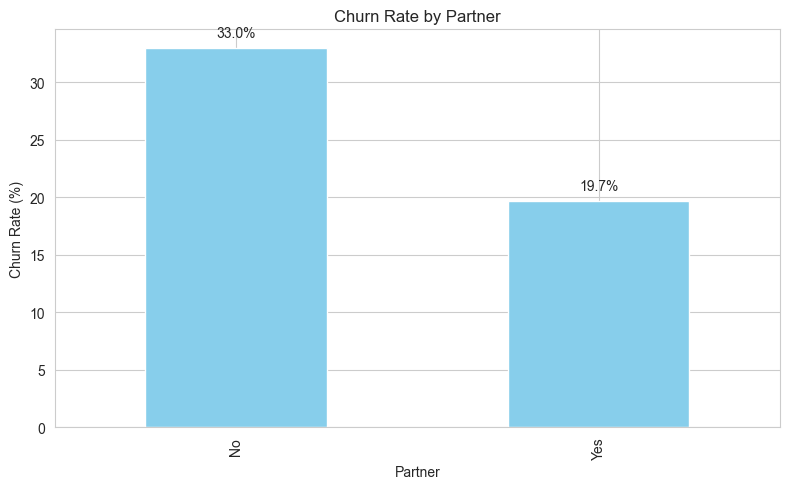

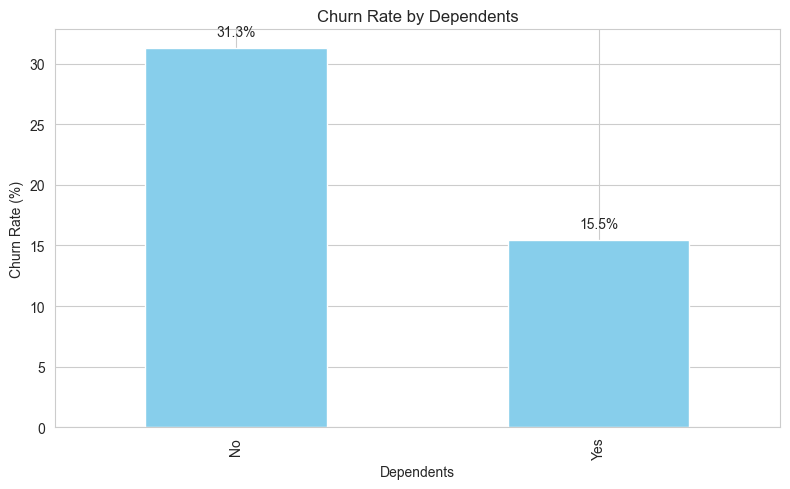

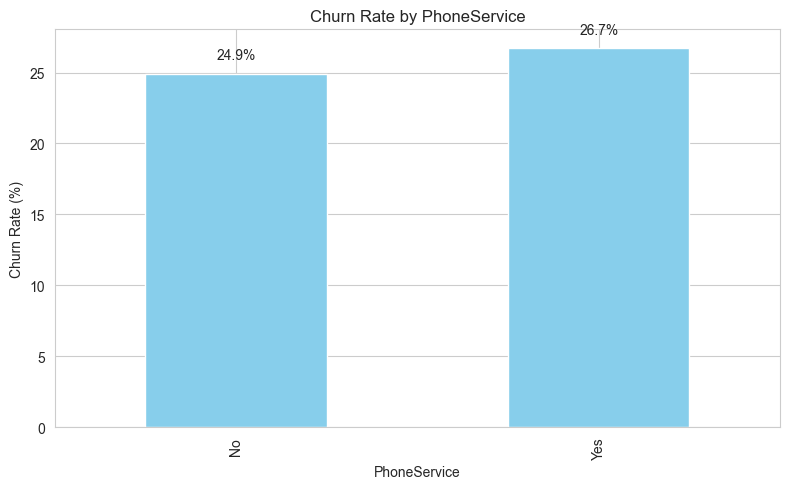

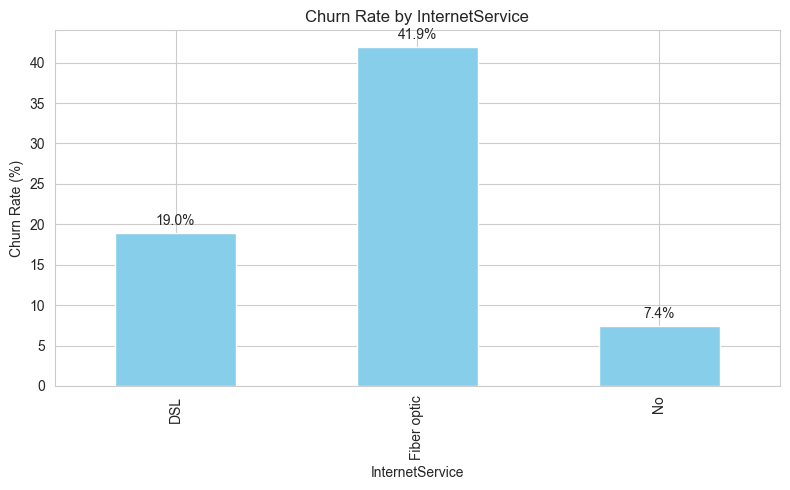

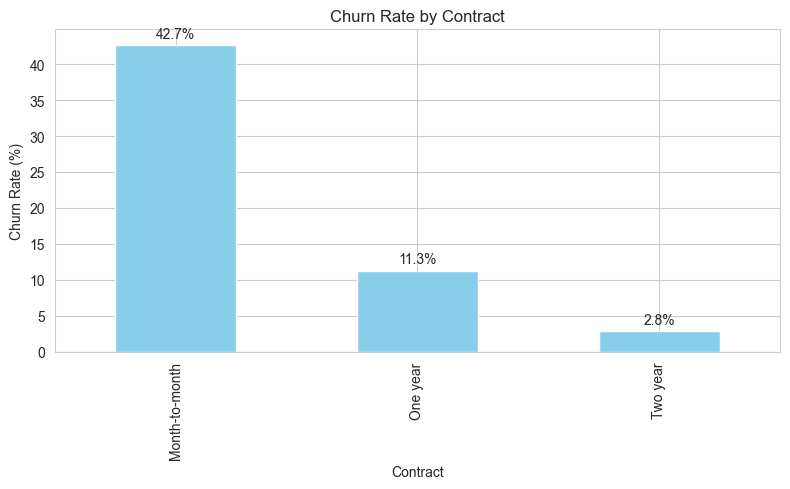

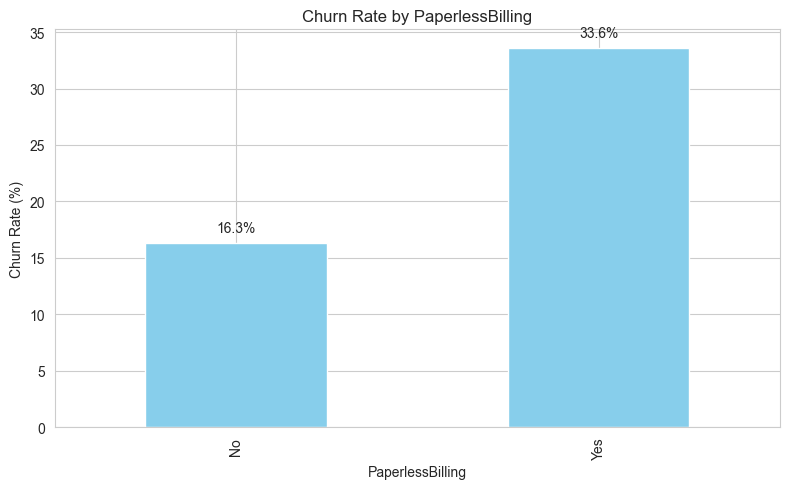

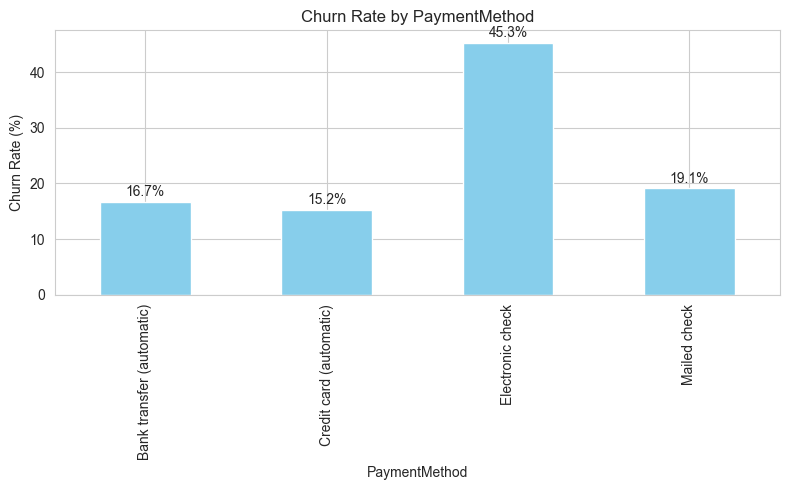

In [ ]:
# EDA - Part 1: Focus on key categorical features
key_categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                           'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Plot individual features vs churn rate
for feature in key_categorical_features:
    plt.figure(figsize=(8, 5))
    # Calculate the percentage of customers who churned for each category
    # Use lambda function to convert Y/N to 1/0 (feature engineering)
    churn_rate = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)

    
    # Plot the bar chart
    ax = churn_rate.plot(kind='bar', color='skyblue')
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel(feature)
    
    # Add percentage labels
    for i, v in enumerate(churn_rate):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    
    plt.tight_layout()
    plt.show()

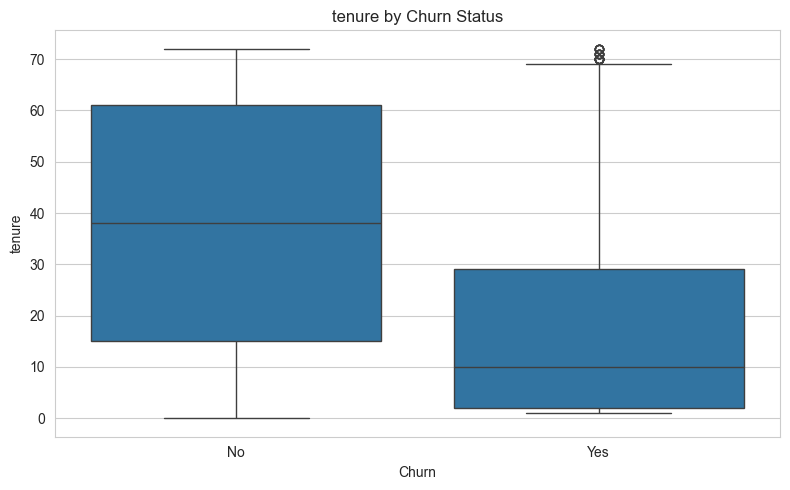

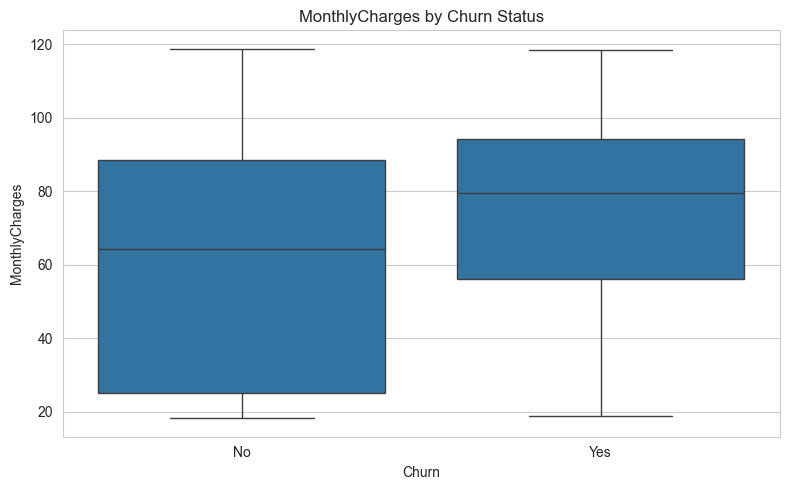

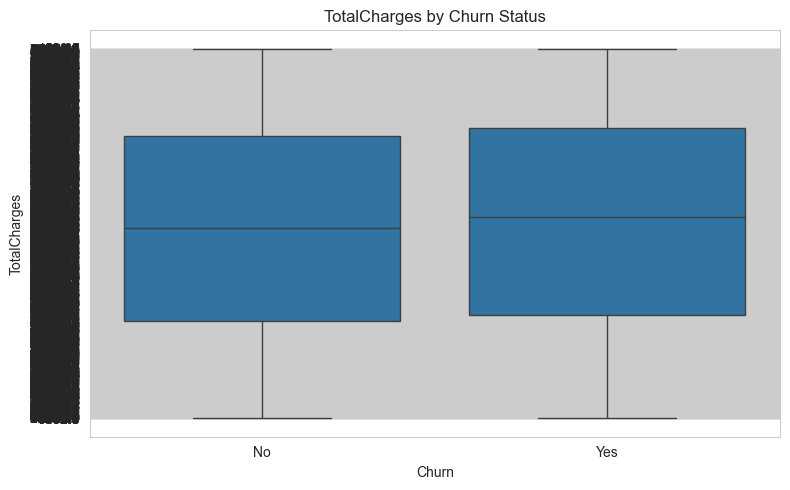

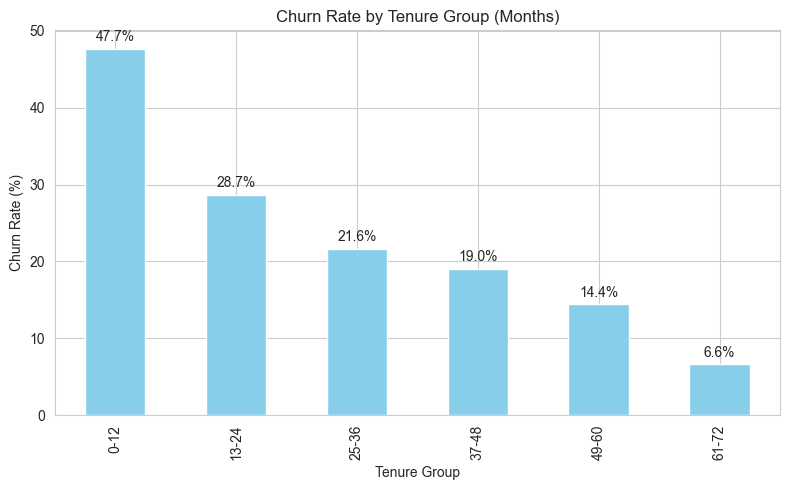

In [7]:
# EDA - Part 2: Numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot boxplots individually
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn Status')
    plt.tight_layout()
    plt.show()

# First, create the Churn_Binary column
df['Churn_Binary'] = (df['Churn'] == 'Yes').astype(int)

# Create tenure bins for easier interpretation
df['tenure_group'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 36, 48, 60, 72], 
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Plot churn rate by tenure group
plt.figure(figsize=(8, 5))
tenure_churn = df.groupby('tenure_group')['Churn_Binary'].mean() * 100
tenure_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Tenure Group (Months)')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
for i, v in enumerate(tenure_churn):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()

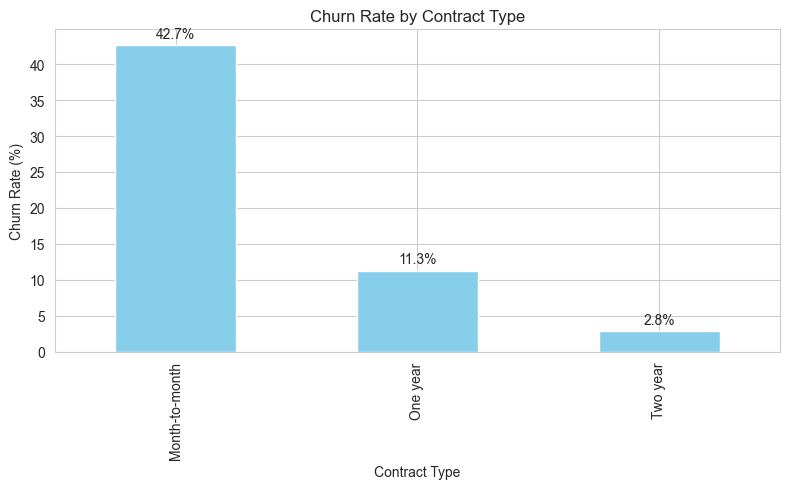

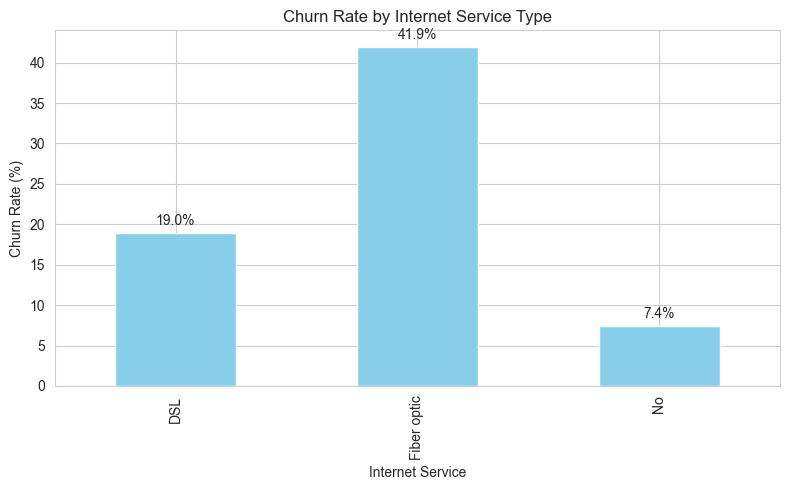

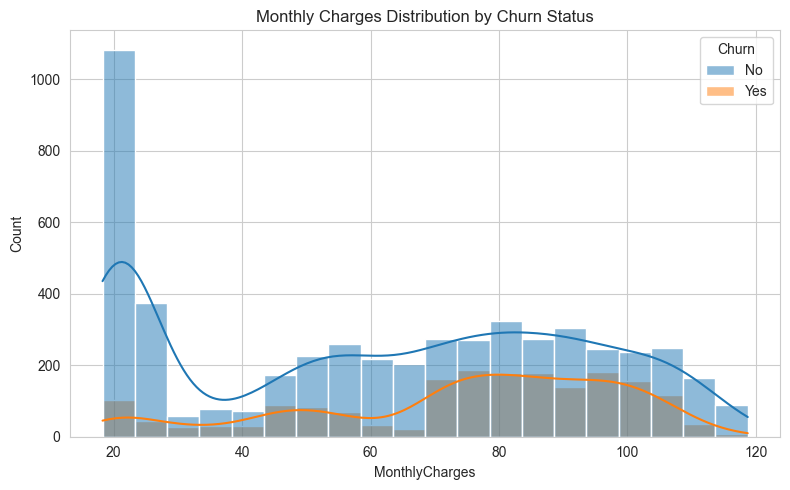

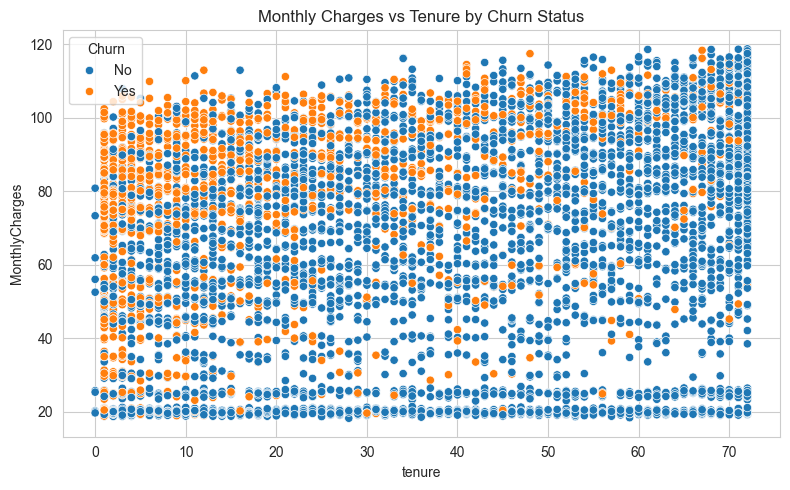

In [8]:
# EDA - Part 3: Key insights plot

# Contract type is usually the strongest predictor
plt.figure(figsize=(8, 5))
contract_churn = df.groupby('Contract')['Churn_Binary'].mean() * 100
contract_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
for i, v in enumerate(contract_churn):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()

# Internet service type analysis
plt.figure(figsize=(8, 5))
internet_churn = df.groupby('InternetService')['Churn_Binary'].mean() * 100
internet_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Internet Service')
for i, v in enumerate(internet_churn):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.tight_layout()
plt.show()

# Monthly charges distribution by churn status
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=20, kde=True)
plt.title('Monthly Charges Distribution by Churn Status')
plt.tight_layout()
plt.show()

# Basic scatter plot - tenure vs monthly charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Tenure by Churn Status')
plt.tight_layout()
plt.show()

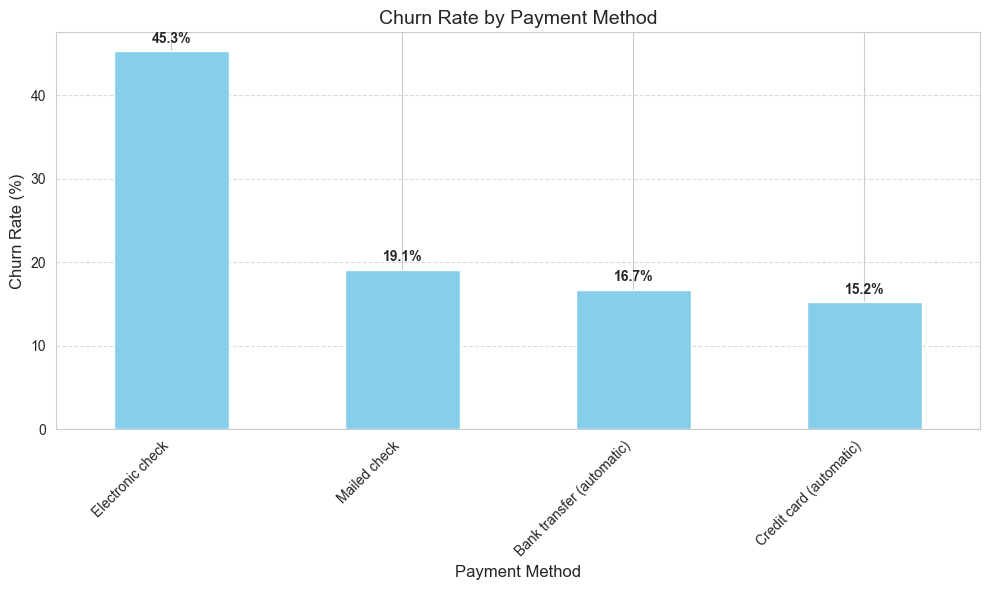

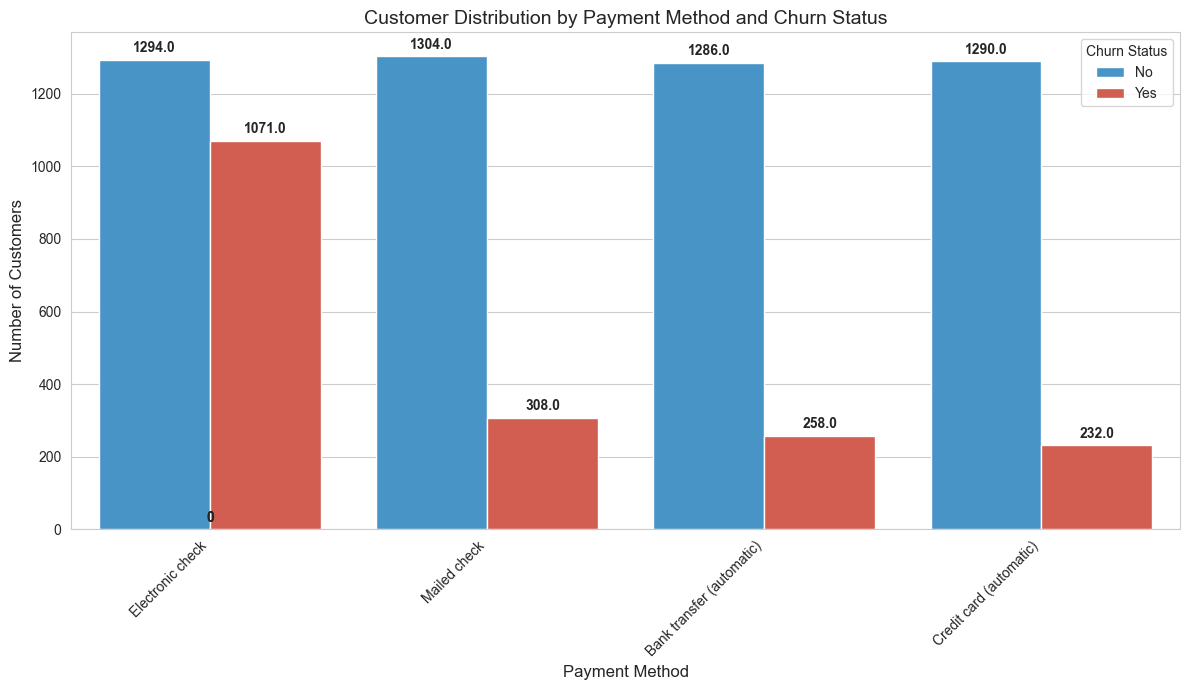

In [9]:
# 1. Visualizing Payment Methods vs Churn

# Bar chart of churn rate by payment method
plt.figure(figsize=(10, 6))
payment_churn = df.groupby('PaymentMethod')['Churn_Binary'].mean() * 100
payment_churn.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Payment Method', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of bars
for i, v in enumerate(payment_churn.sort_values(ascending=False)):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
    
plt.tight_layout()
plt.show()

# Count plot showing distribution of customers by payment method and churn
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Customer Distribution by Payment Method and Churn Status', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn Status')

# Add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 20, f'{height}', 
            ha = 'center', fontweight='bold')
            
plt.tight_layout()
plt.show()

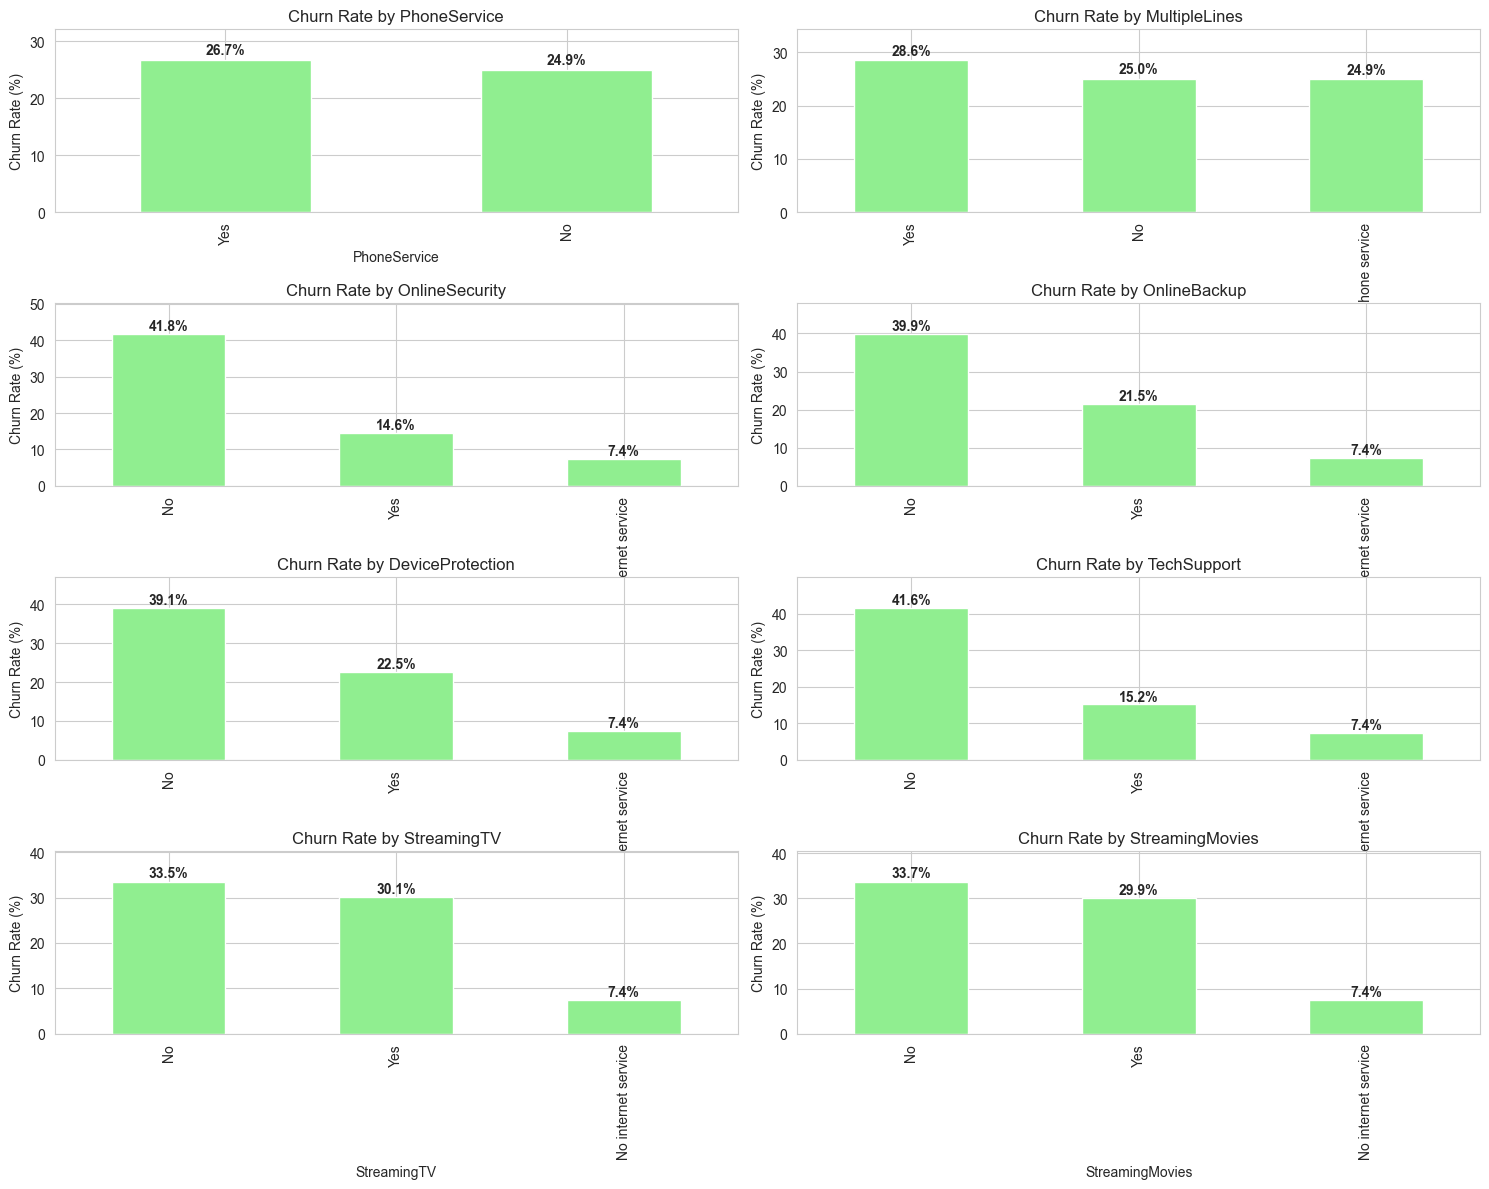

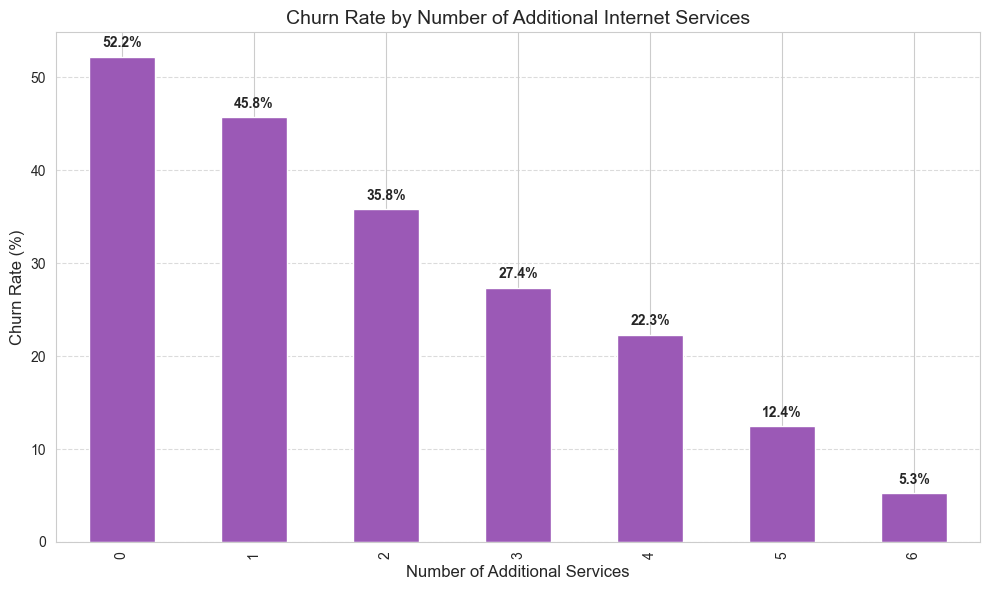

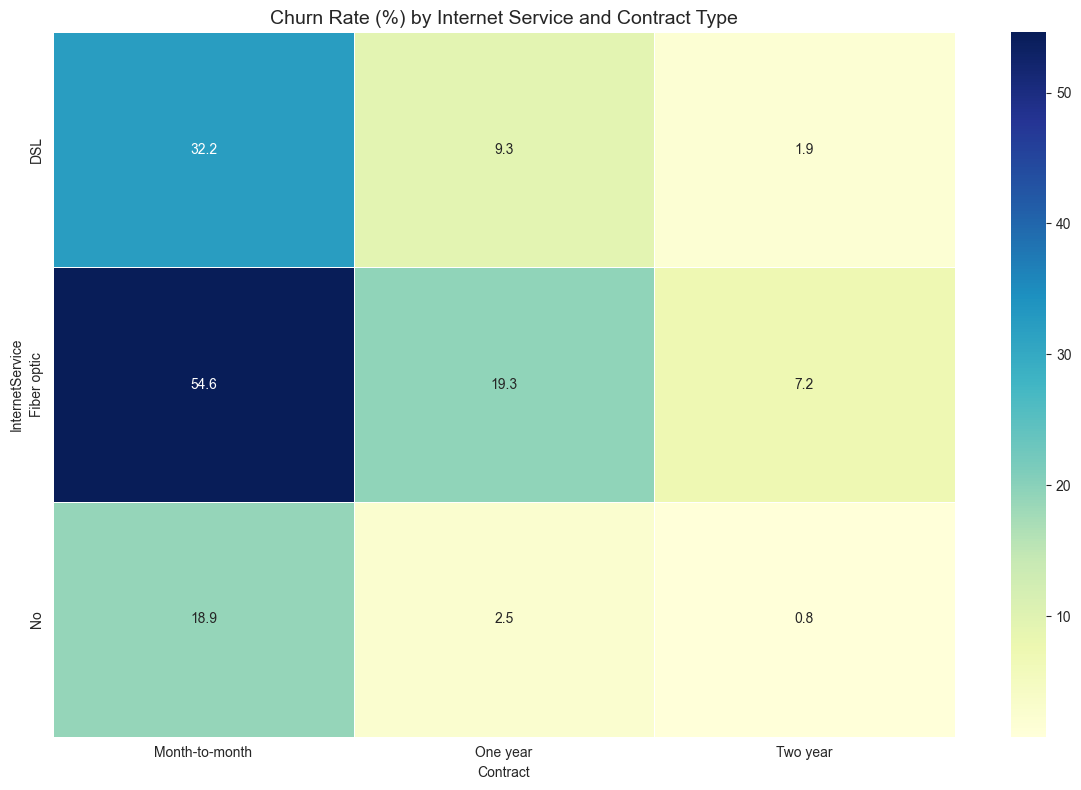

In [10]:
# 2. Visualizing Additional Services vs Churn

# List of additional service columns
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure with subplots for each service
plt.figure(figsize=(15, 12))

for i, service in enumerate(service_cols, 1):
    plt.subplot(4, 2, i)
    
    # Calculate churn rate for each category in the service
    service_churn = df.groupby(service)['Churn_Binary'].mean() * 100
    service_churn.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
    
    plt.title(f'Churn Rate by {service}', fontsize=12)
    plt.ylabel('Churn Rate (%)')
    plt.ylim(0, service_churn.max() * 1.2)  # Set y-axis limit with some padding
    
    # Add percentage labels
    for j, v in enumerate(service_churn.sort_values(ascending=False)):
        plt.text(j, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

# Create a service heatmap to visualize combinations
# First, let's look at internet-related services only
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create binary indicators for each service (1 if 'Yes', 0 otherwise)
for service in internet_services:
    df[f'{service}_Yes'] = (df[service] == 'Yes').astype(int)

# Calculate service count for customers with internet
internet_customers = df[df['InternetService'] != 'No']
internet_customers['ServiceCount'] = internet_customers[[f'{service}_Yes' for service in internet_services]].sum(axis=1)

# Plot churn rate by number of additional services
plt.figure(figsize=(10, 6))
service_count_churn = internet_customers.groupby('ServiceCount')['Churn_Binary'].mean() * 100
service_count_churn.plot(kind='bar', color='#9b59b6')
plt.title('Churn Rate by Number of Additional Internet Services', fontsize=14)
plt.xlabel('Number of Additional Services', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, v in enumerate(service_count_churn):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
    
plt.tight_layout()
plt.show()

# Create a heatmap of service combinations vs InternetService type
plt.figure(figsize=(12, 8))
pivot_table = df.pivot_table(values='Churn_Binary', 
                             index='InternetService',
                             columns='Contract', 
                             aggfunc='mean') * 100

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
plt.title('Churn Rate (%) by Internet Service and Contract Type', fontsize=14)
plt.tight_layout()
plt.show()